# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Bayu Setyawan]
- **Email:** [mc568d5y1186@student.devacademy.id]
- **ID Dicoding:** [mc568d5y1186]

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan dalam beberapa bulan terakhir?
- Bagaimana pengaruh musim dan cuaca terhadap jumlah peminjam sepeda?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel day_df

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel hour_df

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan tabel day_df

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Membersihkan tabel hour_df

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [17]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore day_df

In [19]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [20]:
day_df.instant.is_unique

True

In [21]:
day_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

,instant
season,
3,188
2,184
1,181
4,178


In [22]:
day_df.groupby(by="yr").instant.nunique().sort_values(ascending=False)

,instant
yr,
1,366
0,365


In [23]:
day_df.groupby(by="mnth").instant.nunique().sort_values(ascending=False)

,instant
mnth,
1,62
3,62
5,62
7,62
8,62
10,62
12,62
4,60
6,60


In [24]:
day_df.groupby(by="holiday").instant.nunique().sort_values(ascending=False)

,instant
holiday,
0,710
1,21


In [25]:
day_df.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

,instant
weekday,
0,105
1,105
6,105
2,104
3,104
4,104
5,104


In [26]:
day_df.groupby(by="workingday").instant.nunique().sort_values(ascending=False)

,instant
workingday,
1,500
0,231


In [27]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "temp": ["max", "min", "mean", "std"],
    "atemp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"],
})

instant      temp                                  atemp            \
           nunique       max      min      mean       std       max       min   
weathersit                                                                      
1              463  0.861667  0.05913  0.511541  0.191165  0.840896  0.079070   
2              247  0.815000  0.10750  0.470366  0.167180  0.826371  0.119337   
3               21  0.633913  0.21750  0.433440  0.131473  0.555361  0.203600   

                                     hum                                \
                mean       std       max       min      mean       std   
weathersit                                                               
1           0.488596  0.170242  0.835833  0.187917  0.565594  0.112472   
2           0.452868  0.148403  0.972500  0.407083  0.725887  0.109648   
3           0.413064  0.120748  0.970417  0.000000  0.848872  0.201572   

           windspeed                                
                 max       min      mean       std  
weathersit                                          
1           0.507463  0.022392  0.190253  0.077530  
2           0.414800  0.047275  0.186431  0.075331  
3           0.358200  0.097021  0.243336  0.086185

In [28]:
day_df.groupby(by="yr").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
})

,cnt,casual,registered
yr,,,
0,3405.761644,677.402740,2728.358904
1,5599.934426,1018.483607,4581.450820


### Explore hour_df

In [29]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [30]:
hour_df.instant.is_unique

True

In [31]:
hour_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

,instant
season,
3,4496
2,4409
1,4242
4,4232


In [32]:
hour_df.groupby(by="yr").instant.nunique().sort_values(ascending=False)

,instant
yr,
1,8734
0,8645


In [33]:
hour_df.groupby(by="mnth").instant.nunique().sort_values(ascending=False)

,instant
mnth,
5,1488
7,1488
12,1483
8,1475
3,1473
10,1451
6,1440
4,1437
9,1437


In [34]:
hour_df.groupby(by="hr").instant.nunique().sort_values(ascending=False)

,instant
hr,
17,730
16,730
13,729
15,729
14,729
12,728
22,728
21,728
20,728


In [35]:
hour_df.groupby(by="holiday").instant.nunique().sort_values(ascending=False)

,instant
holiday,
0,16879
1,500


In [36]:
hour_df.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

,instant
weekday,
6,2512
0,2502
5,2487
1,2479
3,2475
4,2471
2,2453


In [37]:
hour_df.groupby(by="workingday").instant.nunique().sort_values(ascending=False)

,instant
workingday,
1,11865
0,5514


In [38]:
hour_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "temp": ["max", "min", "mean", "std"],
    "atemp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"],
})

instant  temp                             atemp                    \
           nunique   max   min      mean       std     max     min      mean   
weathersit                                                                     
1            11413  1.00  0.02  0.511054  0.200775  1.0000  0.0000  0.488387   
2             4544  0.96  0.02  0.474445  0.175933  0.8939  0.0000  0.456591   
3             1419  0.92  0.08  0.456688  0.160509  0.8939  0.0455  0.436386   
4                3  0.22  0.14  0.186667  0.041633  0.2273  0.1364  0.186900   

                       hum                            
                 std   max   min      mean       std  
weathersit                                            
1           0.178958  1.00  0.08  0.573747  0.178463  
2           0.157263  1.00  0.00  0.698807  0.172478  
3           0.144079  1.00  0.00  0.827632  0.157370  
4           0.046284  0.93  0.86  0.883333  0.040415

In [39]:
hour_df.groupby(by="yr").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
})

,cnt,casual,registered
yr,,,
0,143.794448,28.600578,115.193869
1,234.666361,42.679757,191.986604


### Eksplorasi all data

In [40]:
day_df.describe(include="all")
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [41]:
hour_df.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977
14964,14965,2012-09-20,3,1,9,17,0,4,1,1,0.64,0.6212,0.50,0.2239,91,885,976
14748,14749,2012-09-11,3,1,9,17,0,2,1,1,0.70,0.6364,0.28,0.0000,168,802,970
14725,14726,2012-09-10,3,1,9,18,0,1,1,1,0.62,0.6212,0.35,0.2985,111,857,968
15084,15085,2012-09-25,4,1,9,17,0,2,1,1,0.66,0.6212,0.39,0.2836,107,860,967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304,11305,2012-04-21,2,1,4,5,0,6,0,1,0.50,0.4848,0.82,0.2537,0,1,1
435,436,2011-01-20,1,0,1,4,0,4,1,1,0.26,0.2576,0.56,0.1642,0,1,1
434,435,2011-01-20,1,0,1,3,0,4,1,1,0.26,0.2576,0.56,0.1642,0,1,1
1041,1042,2011-02-16,1,0,2,3,0,3,1,2,0.20,0.1970,0.47,0.1940,0,1,1


In [42]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [43]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Bagaimana performa penyewaan dalam beberapa bulan terakhir?

In [44]:
all_df.sample(5)

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
533,534,2012-06-17,2,1,6,0,0,0,1,0.592500,...,1,1,1,0.06,0.1515,0.41,0.0000,4,98,102
471,472,2012-04-16,2,1,4,1,1,0,1,0.664167,...,5,1,1,0.16,0.1364,0.26,0.3582,0,97,97
354,355,2011-12-21,1,0,12,0,3,1,2,0.428333,...,0,0,2,0.26,0.2576,0.56,0.1642,0,1,1
181,182,2011-07-01,3,0,7,0,5,1,1,0.722500,...,6,0,1,0.12,0.1212,0.36,0.2537,0,28,28
217,218,2011-08-06,3,0,8,0,6,0,2,0.716667,...,1,1,2,0.12,0.1212,0.50,0.2836,4,184,188


In [45]:
all_df["dteday_x"] = pd.to_datetime(all_df["dteday_x"])
latest_year = all_df["dteday_x"].dt.year.max()
filtered_df = all_df[all_df["dteday_x"].dt.year == latest_year]

mountly_df = filtered_df.resample(rule='ME', on='dteday_x').agg({
    "instant": "nunique",
    "cnt_x": "sum"
})
month_labels = {
    1: "Januari",
    2: "Februari",
    3: "Maret",
    4: "April",
    5: "Mei",
    6: "Juni",
    7: "Juli",
    8: "Agustus",
    9: "September",
    10: "Oktober",
    11: "November",
    12: "Desember"
}

mountly_df.index = mountly_df.index.strftime('%B')
mountly_df = mountly_df.reset_index()
mountly_df.rename(
    columns={"dteday_x": "bulan"},
    inplace=True)
mountly_df.head()

,bulan,instant,cnt_x
0,January,31,96744
1,February,29,103137
2,March,31,164875
3,April,30,174224
4,May,31,195865


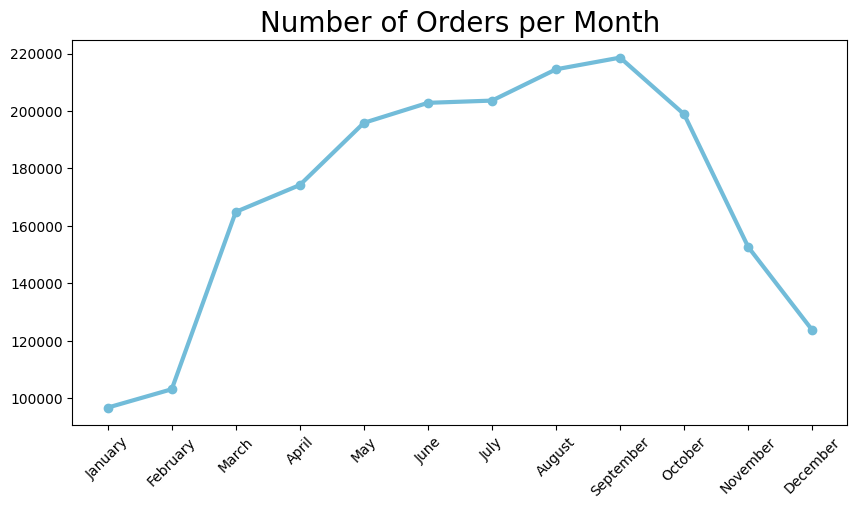

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(
    mountly_df["bulan"],
    mountly_df["cnt_x"],
    marker = 'o',
    linewidth = 3,
    color='#72BCD9')
plt.title("Number of Orders per Month", loc="center", fontsize=20)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Bagaimana pengaruh cuaca terhadap jumlah peminjam sepeda

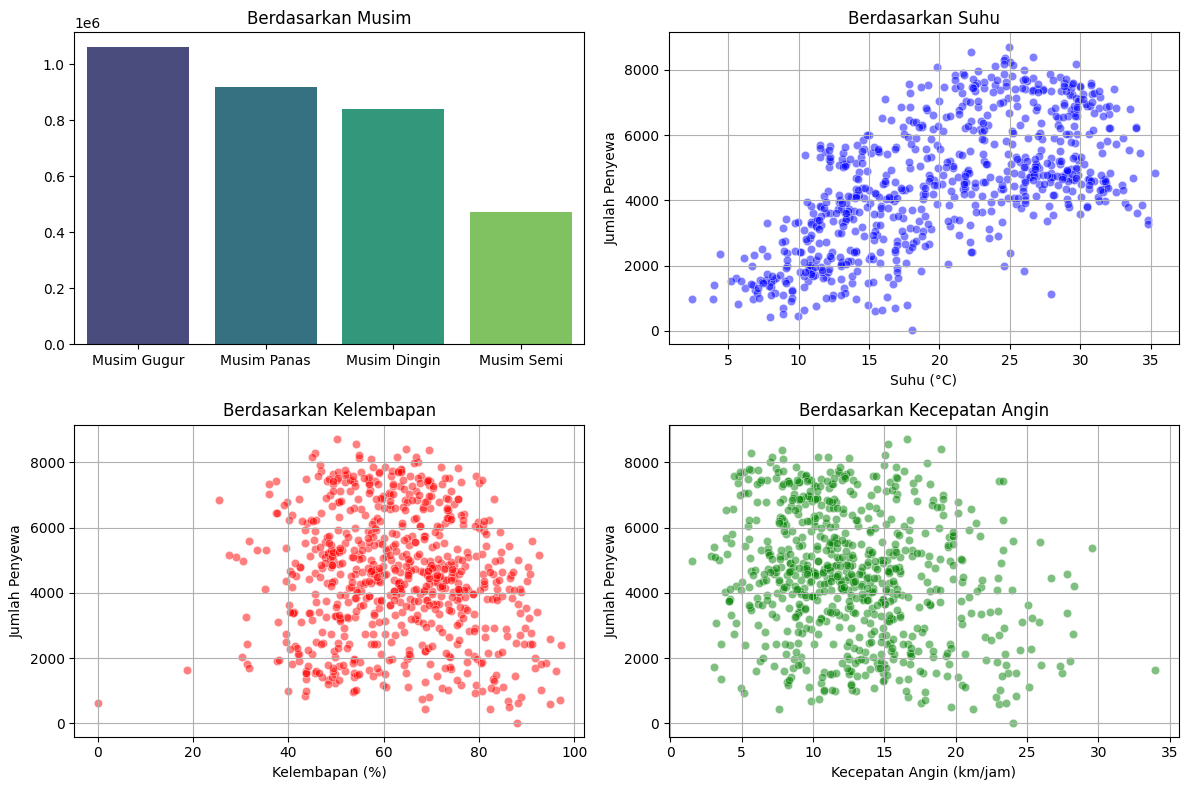

In [73]:
all_df["dteday_x"] = pd.to_datetime(all_df["dteday_x"])
all_df["total_users"] = all_df["casual_x"] + all_df["registered_x"]
all_df["temp_celsius"] = all_df["temp_x"] * 41
all_df["humidity_percent"] = all_df["hum_x"] * 100
all_df["windspeed_kmh"] = all_df["windspeed_x"] * 67

season_labels = {
    1: "Musim Semi",
    2: "Musim Panas",
    3: "Musim Gugur",
    4: "Musim Dingin"
}

# Kelompokkan data berdasarkan musim
byseason_df = all_df.groupby("season_x", as_index=False).agg({"total_users": "sum"}).rename(columns={"total_users": "customer_count"})
byseason_df["season_x"] = byseason_df["season_x"].map(season_labels)

# Buat subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Barplot Musim
sns.barplot(
    y="customer_count",
    x="season_x",
    data=byseason_df.sort_values(by="customer_count", ascending=False),
    palette="viridis",
    hue="season_x",
    ax=axes[0, 0]
)
axes[0, 0].set_title("Berdasarkan Musim", fontsize=12)
axes[0, 0].set_xlabel(None)
axes[0, 0].set_ylabel(None)\

# Scatter plot Suhu
sns.scatterplot(x=all_df["temp_celsius"], y=all_df["cnt_x"], alpha=0.5, color="blue", ax=axes[0, 1])
axes[0, 1].set_title("Berdasarkan Suhu", fontsize=12)
axes[0, 1].set_xlabel("Suhu (°C)")
axes[0, 1].set_ylabel("Jumlah Penyewa")
axes[0, 1].grid(True)

# Scatter plot Kelembapan
sns.scatterplot(x=all_df["humidity_percent"], y=all_df["cnt_x"], alpha=0.5, color="red", ax=axes[1, 0])
axes[1, 0].set_title("Berdasarkan Kelembapan", fontsize=12)
axes[1, 0].set_xlabel("Kelembapan (%)")
axes[1, 0].set_ylabel("Jumlah Penyewa")
axes[1, 0].grid(True)

# Scatter plot Kecepatan Angin
sns.scatterplot(x=all_df["windspeed_kmh"], y=all_df["cnt_x"], alpha=0.5, color="green", ax=axes[1, 1])
axes[1, 1].set_title("Berdasarkan Kecepatan Angin", fontsize=12)
axes[1, 1].set_xlabel("Kecepatan Angin (km/jam)")
axes[1, 1].set_ylabel("Jumlah Penyewa")
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()


## Analisis Lanjutan (opsional)

## Conclusion

- Bagaimana performa penyewaan dalam beberapa bulan terakhir?
berdasarkan Visualisasi data tersebut penyewaan tertinggi berada di bulan september dan mengalami peningkatan penewaan dari januari sampai september, namun menurun dari september ke desember
- Bagaimana pengaruh musim dan cuaca terhadap jumlah peminjam sepeda?
berdasarkan Visualisasi data tersebut Peminjaman sepeda lebih banyak saat cuaca hangat dan stabil, sementara kondisi ekstrem seperti suhu dingin, kelembapan tinggi, atau angin kencang cenderung mengurangi jumlah pengguna.